# Stock Prediction Test 01

Link do vídeo:

https://www.youtube.com/watch?v=hOLSGMEEwlI

Peguei os dados das ações do Yahoo (Historical Data > Time Period > Apply > Download):

https://finance.yahoo.com

In [0]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [0]:
# Load the data (DEPRECATED... GETTING FROM GITHUB)
# from google.colab import files
# uploaded = files.upload()

In [26]:
# Store the data into a data frame
# df = pd.read_csv('GOOG.csv')
url = 'https://raw.githubusercontent.com/ThiagoGarciaAlves/stock-prediction-tests/master/stocks/GOOG.csv'
df = pd.read_csv(url)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [27]:
df.shape

(3982, 7)

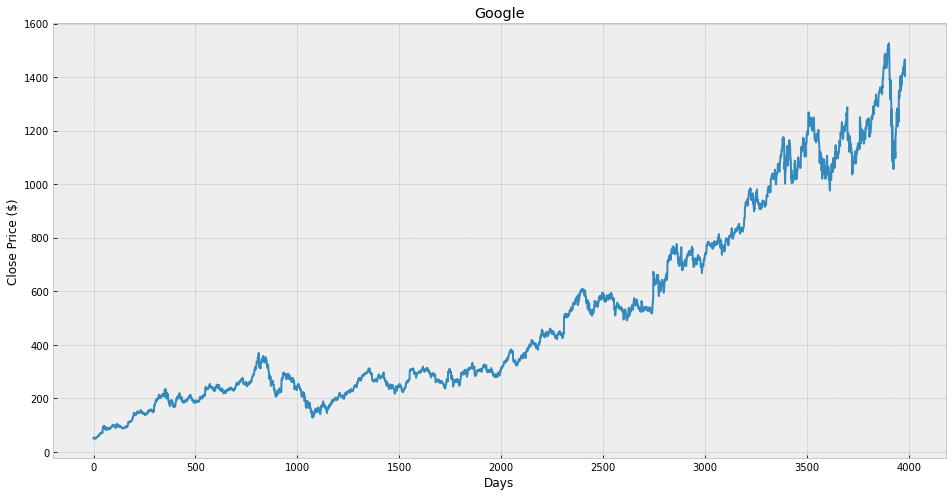

In [28]:
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['Close'])
plt.show()

In [31]:
# Get the close price
df = df[['Close']]
df.head(5)

,Close
0,49.982655
1,53.952770
2,54.495735
3,52.239193
4,52.802086


In [44]:
# Create a variable to predict 'x' days out into the future
future_days = 100
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(7)

,Close,Prediction
3975,1412.180054,NaN
3976,1438.390015,NaN
3977,1446.609985,NaN
3978,1456.160034,NaN
3979,1465.849976,NaN
3980,1403.839966,NaN
3981,1413.180054,NaN


In [45]:
# Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[  49.982655]
 [  53.95277 ]
 [  54.495735]
 ...
 [1451.699951]
 [1480.390015]
 [1484.400024]]


In [46]:
# Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  96.408638   97.325203   97.300293 ... 1465.849976 1403.839966
 1413.180054]


In [0]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [0]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [49]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[1171.02002 ],
       [1192.849976],
       [1188.099976],
       [1168.390015],
       [1181.410034],
       [1211.380005],
       [1204.930054],
       [1204.410034],
       [1206.      ],
       [1220.170044],
       [1234.25    ],
       [1239.560059],
       [1231.300049],
       [1229.150024],
       [1232.410034],
       [1238.709961],
       [1229.930054],
       [1234.030029],
       [1218.76001 ],
       [1246.52002 ],
       [1241.390015],
       [1225.089966],
       [1219.      ],
       [1205.099976],
       [1176.630005],
       [1187.829956],
       [1209.      ],
       [1207.680054],
       [1189.130005],
       [1202.310059],
       [1208.670044],
       [1215.449951],
       [1217.140015],
       [1243.01001 ],
       [1243.640015],
       [1253.069946],
       [1245.48999 ],
       [1246.150024],
       [1242.800049],
       [1259.130005],
       [1260.98999 ],
       [1265.130005],
       [1290.      ],
       [1262.619995],
       [1261.290039],
       [12

In [50]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1116.369995 1486.650024 1318.089966 1433.900024 1452.560059 1458.630005
 1455.839966 1434.22998  1168.890015 1009.409973 1479.22998  1476.22998
 1479.22998  1514.660034 1479.22998  1518.27002  1514.660034 1479.22998
 1519.670044 1526.689941 1119.800049 1485.109985 1421.589966 1388.449951
 1393.180054 1318.089966 1339.329956 1080.969971 1341.390015 1386.52002
 1319.040039 1298.410034 1215.560059 1280.390015 1215.410034 1355.119995
 1219.72998  1084.329956 1119.800049 1096.800049 1115.290039 1072.319946
 1056.619995 1016.530029 1102.48999  1161.75     1110.709961 1105.619995
 1162.810059 1105.619995 1097.880005 1097.880005 1186.920044 1186.51001
 1210.280029 1097.880005 1417.02002  1269.22998  1262.469971 1263.469971
 1283.25     1266.609985 1279.310059 1263.209961 1276.310059 1279.310059
 1056.619995 1233.670044 1341.47998  1348.660034 1320.609985 1351.109985
 1351.109985 1347.300049 1372.560059 1388.369995 1403.26001  1375.73999
 1349.329956 1356.130005 1373.189941 1383.939941 1351.10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


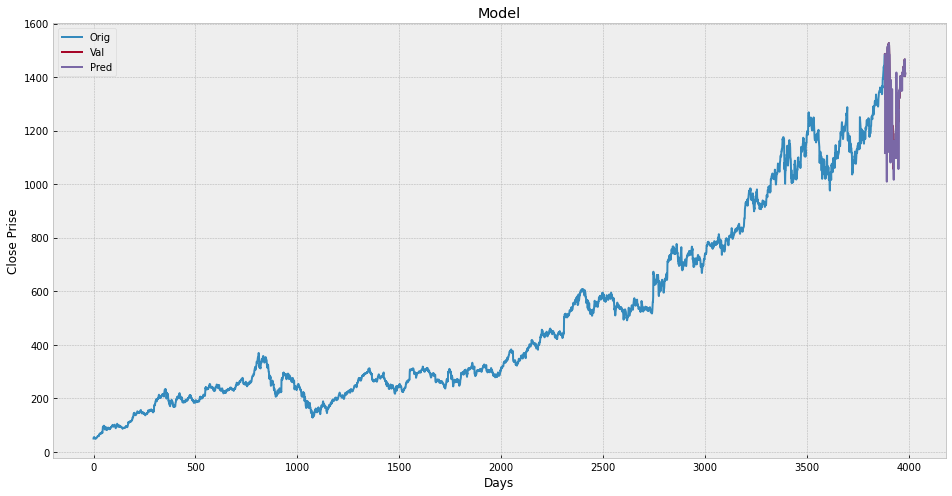

In [51]:
# Visualize the data
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Prise')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


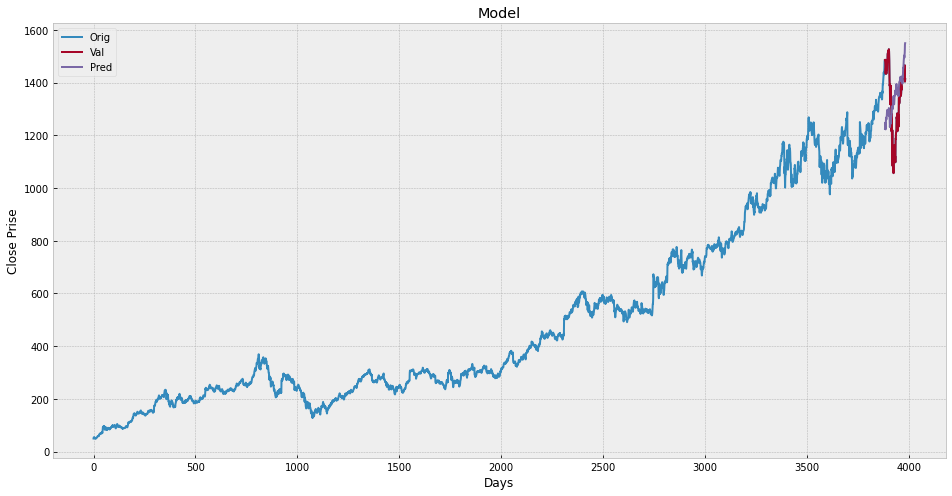

In [52]:
# Visualize the data
predictions = lr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Prise')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()